# Rapport : Projet QAP

In [1]:
import time

import numpy as np
import random as rd
import pandas as pd
import sys
sys.path.insert(0, '../src/model/')
sys.path.insert(1, '../src/view/')
from Taixxa import Taixxa
from FitnessViewer import FitnessViewer
from FitnessComparator import FitnessComparator
from Permutation import Permutation 
from SimulatedAnnealing import SimulatedAnnealing
from TabuSearch import TabuSearch

Définition de quelques fonction qui vont définir comment va varier la température pour l'algorithme de recuit simulé : 


>\\( f_{\exp\sin} \\) est une fonction sinusoidale pondérée par une exponentielle négative (cf premier graph)


>\\( f_{\sin} \\) est une fonction sinusoidale simple (cf second graph)


>\\( f_{\exp} \\) est une fonction exponentielle négative simple (cf troisième graph)

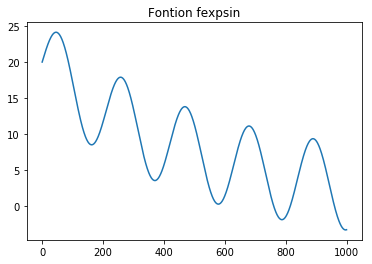

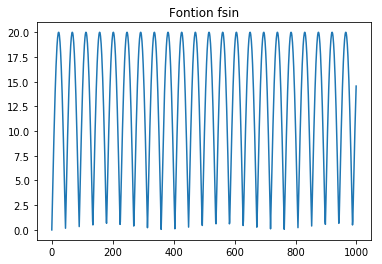

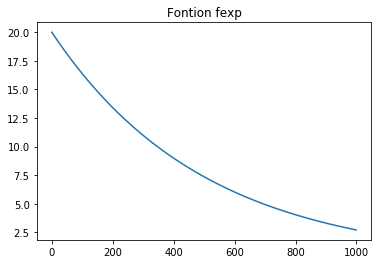

In [2]:
def fexpsin(t,i):
    return t*np.exp(-float(i)/500.0) + 0.3*t*(np.sin(float(i)*0.03))

def fsin(t,i):
    return t*np.abs(np.sin(float(i)*0.07))

def fexp(t,i):
    return t*np.exp(-float(i)/500.0)

t = 20
x = range(1000)
y1 = [fexpsin(t,a) for a in x]
y2 = [fsin(t,a) for a in x]
y3 = [fexp(t,a) for a in x]
viewer = FitnessViewer(np.array(y1))
viewer.plot('Fontion fexpsin')
viewer = FitnessViewer(np.array(y2))
viewer.plot('Fontion fsin')
viewer = FitnessViewer(np.array(y3))
viewer.plot('Fontion fexp')


file hash not yet created think about saving for next time
[13, 7, 2, 14, 5, 0, 4, 12, 9, 1, 11, 10, 8, 3, 6]
simulated annealing ....


<Figure size 432x288 with 0 Axes>

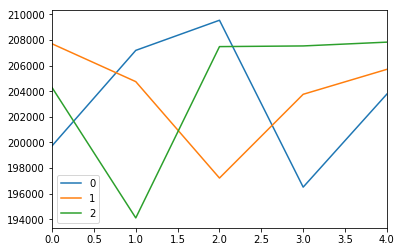

In [13]:
start_time = time.time()
# your code
elapsed_time = time.time() - start_time



data = Taixxa()
data.loadFile("tai15a.dat")

siman = SimulatedAnnealing(data)
tabuS = TabuSearch(data)

print("simulated annealing ....")

sols = []
sols2 = []
sols3 = []

for i in range(5):
    sol, fit1,temps = siman.solve(30, 0.9,500,11,fexpsin)
    sols.append(sol.computeCost(data))
    
for i in range(5):
    sol, fit1,temps = siman.solve(30, 0.9,500,11,fsin)
    sols2.append(sol.computeCost(data))
    
for i in range(5):
    sol, fit1,temps = siman.solve(30, 0.9,500,11,fexp)
    sols3.append(sol.computeCost(data))
    
lists = list([sols,sols2,sols3])
df = pd.concat([pd.Series(x) for x in lists], axis=1)
comp = FitnessComparator(df)
comp.plot()



In [10]:
data.saveHashMap()

In [ ]:
sols = []
machin = []
for i in range(20):
    for j in range(20):
        sol, fit = tabuS.solve(50,i)
        sols.append(sol.computeCost(data))
    machin.append(np.mean(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))

In [27]:
sols = np.mean(sols)
sols2 = np.mean(sols2)
sols3 = np.mean(sols3)

print(sols)
print(sols2)
print(sols3)

112208
112208
112208


In [22]:
solPerfect = [8,1,6,2,11,10,3,5,9,7,12,4]
solPerfect = list(map(lambda x: x-1, solPerfect))
solPerfect = Permutation(12,solPerfect)


mincost = solPerfect.computeCost(data)
mincostfound = sol.computeCost(data)
print(mincost)

112208


In [ ]:
print(mincostfound)
print(mincostfound1)
print(mincostfound2)
print(100*(mincostfound-mincost)/mincost)
print(100*(mincostfound1-mincost)/mincost)
print(100*(mincostfound2-mincost)/mincost)